Midterm exam

In [1]:
import json
import time
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [2]:
login_payload = '{"cuni":"48669601"}'

In [3]:
r = requests.post('https://ies-midterm.soulution.rocks/login', login_payload)

In [4]:
r.text

'{"data": {"personal_code": "261710f1", "dataset_ids": ["11f651d1ee", "e2beb850b2", "0a42bff0a1", "24f88cb68c"]}, "message": "Hello, Poizlov\\u00e1 Stanislava! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook."}'

In [5]:
d = json.loads(r.text)

In [6]:
d

{'data': {'personal_code': '261710f1',
  'dataset_ids': ['11f651d1ee', 'e2beb850b2', '0a42bff0a1', '24f88cb68c']},
 'message': 'Hello, Poizlová Stanislava! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook.'}

In [7]:
d['data']

{'personal_code': '261710f1',
 'dataset_ids': ['11f651d1ee', 'e2beb850b2', '0a42bff0a1', '24f88cb68c']}

In [8]:
d['data']['personal_code']

'261710f1'

In [9]:
# get my codes
codes=d['data']['dataset_ids']
codes

['11f651d1ee', 'e2beb850b2', '0a42bff0a1', '24f88cb68c']

In [10]:
collect_data={} #collect data got from server
for data_code in codes:
    r = requests.get(f'https://ies-midterm.soulution.rocks/data/{data_code}')
    print(r)
    while r.status_code != 200: #if not successful yet, repeat until it is successful, when done go to for loop and do with other code
        r = requests.get(f'https://ies-midterm.soulution.rocks/data/{data_code}')
        time.sleep(0.5) #wait so we are ncie to server
        print(r)
    d=r.json()['data'] #transform data for nice form
    
    company_name = d['company'] 
    data = pd.DataFrame(d['data']).set_index('Date')
    data.index = pd.to_datetime(data.index)
    collect_data[company_name] = data #collect data to collector

<Response [503]>
<Response [503]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [11]:
df = pd.concat(collect_data) #join all data frames

In [12]:
df=df.apply(pd.to_numeric) #it is object change to numeric

In [13]:
df[df.isna()==True] #are there na?

Open  High  Low  Close  Adj.Close  Volume
    Date                                                 
MNG 2019-01-02   NaN   NaN  NaN    NaN        NaN     NaN
    2019-01-03   NaN   NaN  NaN    NaN        NaN     NaN
    2019-01-04   NaN   NaN  NaN    NaN        NaN     NaN
    2019-01-07   NaN   NaN  NaN    NaN        NaN     NaN
    2019-01-08   NaN   NaN  NaN    NaN        NaN     NaN
...              ...   ...  ...    ...        ...     ...
PSN 2020-11-17   NaN   NaN  NaN    NaN        NaN     NaN
    2020-11-18   NaN   NaN  NaN    NaN        NaN     NaN
    2020-11-19   NaN   NaN  NaN    NaN        NaN     NaN
    2020-11-20   NaN   NaN  NaN    NaN        NaN     NaN
    NaT          NaN   NaN  NaN    NaN        NaN     NaN

[1355 rows x 6 columns]

In [14]:
df.dropna(how='all',inplace = True) #delete na

#Part2

In [15]:
#yes, can be seen in table above
data.index.min()   

Timestamp('2019-05-08 00:00:00')

In [16]:
data.index.max()

Timestamp('2020-11-20 00:00:00')

In [17]:
df.index.names = ['Company','Date'] #change index names
df

Open       High        Low      Close  Adj.Close  \
Company Date                                                                
MNG     2019-01-02  35.630001  36.810001  34.709999  36.660000  36.660000   
        2019-01-03  36.720001  37.220001  36.130001  36.660000  36.660000   
        2019-01-04  36.660000  38.029999  36.660000  37.970001  37.970001   
        2019-01-07  38.150002  39.560001  37.939999  39.560001  39.560001   
        2019-01-08  39.560001  40.520000  39.560001  40.259998  40.259998   
...                       ...        ...        ...        ...        ...   
PSN     2020-11-16  33.680000  34.169998  32.990002  33.840000  33.840000   
        2020-11-17  33.680000  34.020000  33.049999  33.680000  33.680000   
        2020-11-18  33.910000  33.950001  32.650002  32.790001  32.790001   
        2020-11-19  32.610001  32.830002  31.860001  32.220001  32.220001   
        2020-11-20  32.070000  32.147999  31.575001  31.750000  31.750000   

                      Volume  
Company Date                  
MNG     2019-01-02       0.0  
        2019-01-03       0.0  
        2019-01-04       0.0  
        2019-01-07       0.0  
        2019-01-08       0.0  
...                      ...  
PSN     2020-11-16  436800.0  
        2020-11-17  270000.0  
        2020-11-18  282600.0  
        2020-11-19  661600.0  
        2020-11-20  347700.0  

[1351 rows x 6 columns]

In [18]:
#the highest number of shares traded 
df.groupby('Company')['Adj.Close'].max()

Company
MNG     45.320000
IAG      5.200000
SGRO     0.210000
PSN     45.029999
Name: Adj.Close, dtype: float64

In [19]:
#the lowest number of shares traded 
df.groupby('Company')['Adj.Close'].min()

Company
MNG     14.930000
IAG      1.880000
SGRO     0.155000
PSN     25.309999
Name: Adj.Close, dtype: float64

In [20]:
#day, the highest number of shares traded overall
df.groupby('Company')['Volume'].idxmax()

Company
MNG      (MNG, 2019-01-02 00:00:00)
IAG      (IAG, 2020-02-24 00:00:00)
SGRO    (SGRO, 2019-03-06 00:00:00)
PSN      (PSN, 2019-05-08 00:00:00)
Name: Volume, dtype: object

In [21]:
#company
df.groupby('Company')['Volume'].idxmax().max()

('SGRO', Timestamp('2019-03-06 00:00:00'))

In [22]:
#the total of shares traded 
df.groupby('Company')['Volume'].sum() 

Company
MNG     0.000000e+00
IAG     2.633248e+09
SGRO    1.300000e+03
PSN     1.686474e+08
Name: Volume, dtype: float64

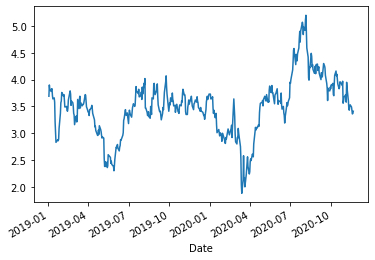

In [23]:
#plot
df.loc['IAG',:]['Adj.Close'].plot()

In [24]:
#highest gain and loss
df.groupby('Company')['High'].max()

Company
MNG     45.689999
IAG      5.350000
SGRO     0.210000
PSN     45.400002
Name: High, dtype: float64

In [25]:
df.groupby('Company')['Low'].max() 


Company
MNG     44.939999
IAG      5.100000
SGRO     0.210000
PSN     44.630001
Name: Low, dtype: float64

In [26]:
#plot the log returns for the company that has the largest difference between opening and closing price